In [1]:
#import all the libraries to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
#read the data
df = pd.read_csv('SeoulBikeData.csv',encoding='latin-1')
df.sample(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
673,29/12/2017,269,1,0.3,63,0.7,760,-5.9,0.00,0.0,0.0,Winter,No Holiday,Yes
6522,29/08/2018,57,18,23.9,96,0.2,991,23.2,0.00,1.5,0.0,Summer,No Holiday,Yes
2535,16/03/2018,923,15,11.9,32,1.9,1976,-4.3,2.62,0.0,0.0,Spring,No Holiday,Yes
1046,13/01/2018,215,14,-1.8,62,0.7,936,-8.1,0.55,0.0,0.0,Winter,No Holiday,Yes
767,01/01/2018,154,23,-1.6,51,0.7,1882,-10.4,0.00,0.0,0.0,Winter,Holiday,Yes


In [3]:
#check the shape 
df.shape

(8760, 14)

In [4]:
#check for missing values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

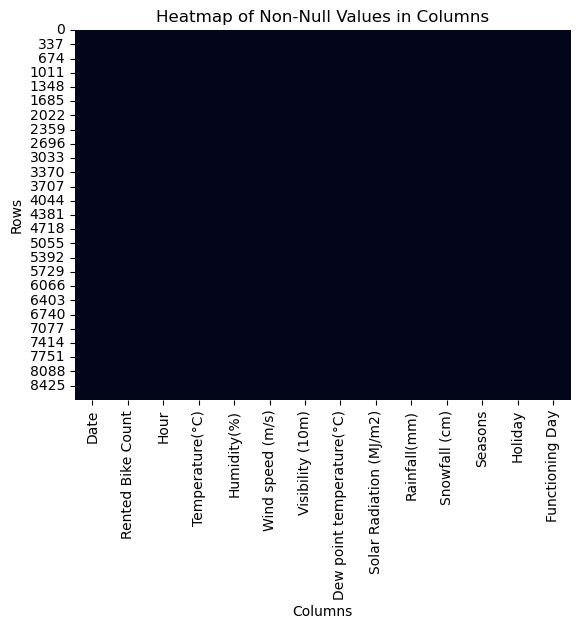

In [5]:
#plotting location of missing values through heatmap
sns.heatmap(df.isnull(),cbar = False)
plt.title('Heatmap of Non-Null Values in Columns')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [6]:
#check for duplicates
df.duplicated().sum()

0

In [7]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

# Data Preprocessing

I have extracted month name, year, day name and day number from the date column for our analyses

In [8]:
# extract name of day, month, year from date column
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')

# Extracting month, year and name of day
df['month'] = df['Date'].dt.month_name()
df['year'] = df['Date'].dt.year
df['day_name'] = df['Date'].dt.day_name()
df['day_number'] = df['Date'].dt.weekday + 1
df.sample(5)


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year,day_name,day_number
5460,2018-07-16,719,12,32.4,49,2.0,1844,20.3,3.09,0.0,0.0,Summer,No Holiday,Yes,July,2018,Monday,1
6702,2018-09-06,680,6,21.4,84,0.8,1506,18.5,0.00,0.0,0.0,Autumn,No Holiday,Yes,September,2018,Thursday,4
3427,2018-04-22,32,19,15.2,64,1.7,1185,8.4,0.02,0.5,0.0,Spring,No Holiday,Yes,April,2018,Sunday,7
2807,2018-03-27,527,23,12.4,74,1.5,356,7.8,0.00,0.0,0.0,Spring,No Holiday,Yes,March,2018,Tuesday,2
561,2017-12-24,3,9,4.6,94,0.9,90,3.7,0.00,6.4,0.0,Winter,Holiday,Yes,December,2017,Sunday,7


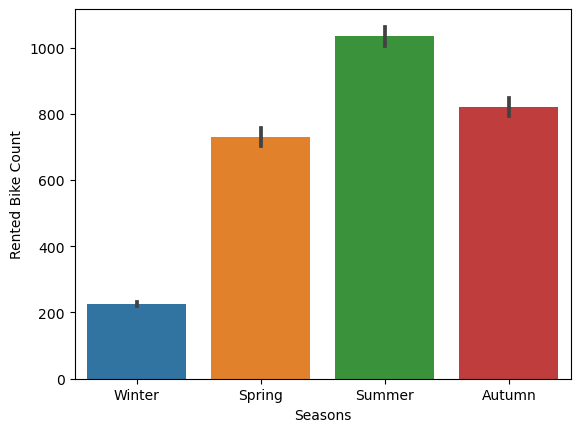

In [9]:
#check rented bike counts based on seasons
sns.barplot(x = 'Seasons',y='Rented Bike Count',data = df)
plt.show()

The summer season seems to be the most popular time for biking in Seoul, followed by Autumn while Winter seems the least favorite time to rent bikes.

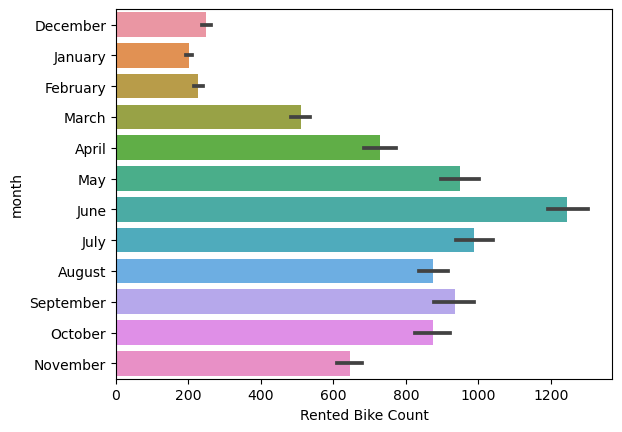

In [10]:
#check rented bikes based on month
sns.barplot(y = 'month',x='Rented Bike Count',data = df)
plt.show()

The summer months of May, June and July have the highest count of bike rentals which confirms the trend we discovered about summer being the most popular time for bike rentals whereas winter months like December, January and February have the least bike rental counts. 

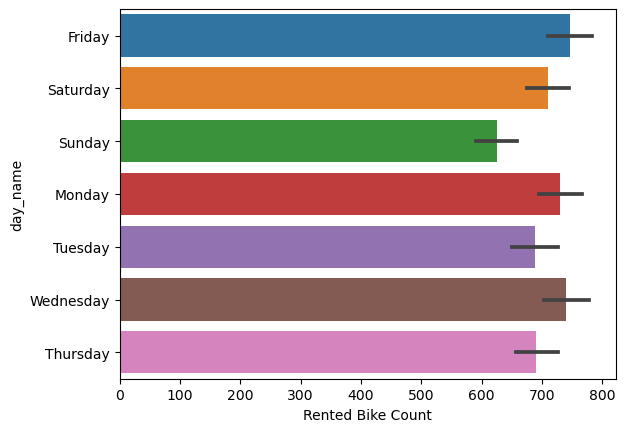

In [11]:
#check for popular biking days
sns.barplot(y = 'day_name',x='Rented Bike Count',data = df)
plt.show()

There isn't a huge variation between bike rental counts based between days in a week.

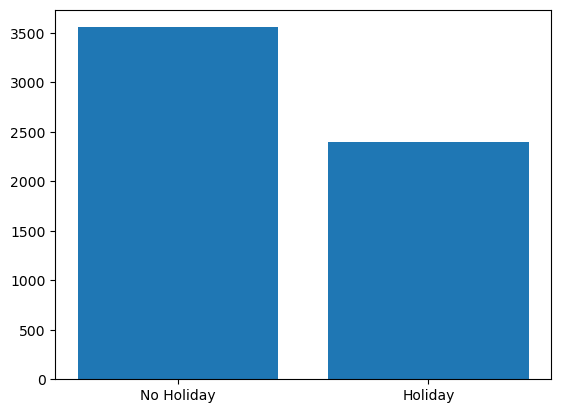

In [12]:
#check if holiday impacts bike renting
plt.bar(x = 'Holiday',height='Rented Bike Count',data = df)
plt.show()

It seems non holiday days see more number of bike rentals which could be due to people commuting to work using bikes.

[2017 2018]


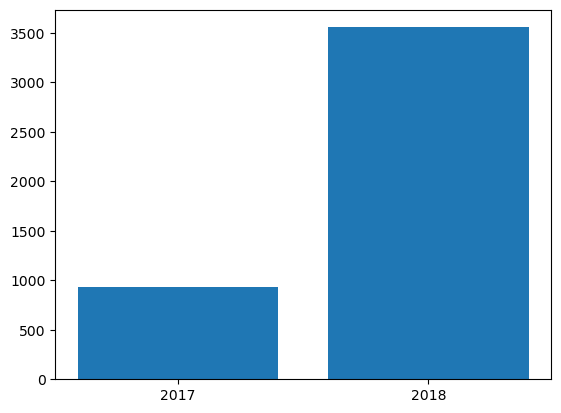

In [13]:
#check distribution based on year
#lets check unique values in year column
print(df['year'].unique())

#convert year column into object
df['year'] = df['year'].astype(str)

#plot the distribution
plt.bar(x='year',height='Rented Bike Count',data = df)
plt.show()

There are more bike rentals in 2018 than in 2017.

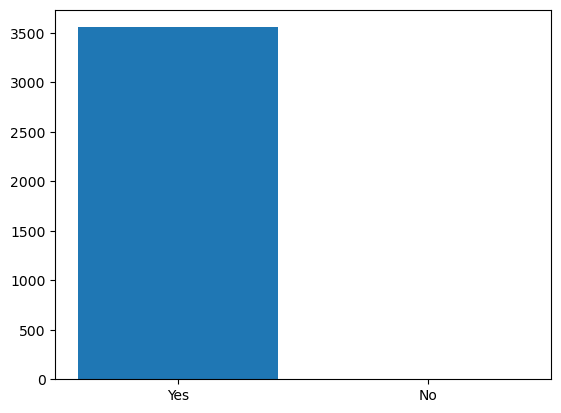

In [14]:
plt.bar(x='Functioning Day',height='Rented Bike Count',data = df)
plt.show()

We can see bike rentals only occur on functioning days, this maybe due to the company not conducting any business hours on some days, therefore we see 0 bike rentals on non functioning days, we can drop this column as this doesn't give any other relevant information for model building.

In [15]:
#lets create a new column called Weekend 
def weekend(x):
    
    if x >=1 and x <= 5:
        return 0
    else:
        return 1
    
df['Weekend'] = df['day_number'].apply(weekend)
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year,day_name,day_number,Weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,2017,Friday,5,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,2017,Friday,5,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,December,2017,Friday,5,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,2017,Friday,5,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,2017,Friday,5,0


In [16]:
#demand based on day and weekend
df.groupby(['day_name','Weekend'])['Rented Bike Count'].describe()

,,count,mean,std,min,25%,50%,75%,max
day_name,Weekend,,,,,,,,
Friday,0,1272.0,747.117925,658.396481,0.0,233.00,566.0,1115.25,3365.0
Monday,0,1248.0,730.563301,664.960809,2.0,186.00,533.0,1099.00,3380.0
Saturday,1,1248.0,709.528846,603.913165,0.0,219.00,519.0,1076.00,2497.0
Sunday,1,1248.0,625.155449,605.529274,0.0,158.75,406.0,936.50,2514.0
Thursday,0,1248.0,690.704327,641.675659,0.0,185.00,495.0,1049.00,3418.0
Tuesday,0,1248.0,687.977564,652.165697,0.0,179.50,485.5,1031.50,3556.0
Wednesday,0,1248.0,740.349359,677.573675,0.0,206.75,536.5,1107.25,3384.0


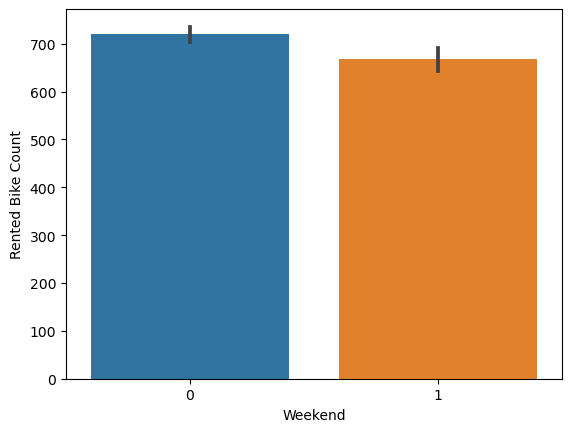

In [17]:
#check demand based on Weekday and Weekend
sns.barplot(x = 'Weekend',y='Rented Bike Count',data = df)
plt.show()

There is a slight drop in demand over the weekend, something which we discovered already as non-holiday days saw more bike rentals.

In [18]:
#lets divide hour feature into phases of a day
def time_of_day(x):
    
    if x < 5 or x > 21:
        return 'Night'
    elif x >= 5 and x <= 12:
        return 'Morning'
    elif x > 12 and x <= 17:
        return 'Afternoon'
    elif x > 17 and x <= 21:
        return 'Evening'
    
#apply binning to hour column to extract time of day
df['time_of_day'] = df['Hour'].apply(time_of_day)
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year,day_name,day_number,Weekend,time_of_day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,2017,Friday,5,0,Night
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,2017,Friday,5,0,Night
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,December,2017,Friday,5,0,Night
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,2017,Friday,5,0,Night
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,2017,Friday,5,0,Night


In [19]:
#bike rental counts based on time of day
bike_rents = df.groupby('time_of_day')['Rented Bike Count'].mean().reset_index().sort_values(by = 'Rented Bike Count',ascending = False)
bike_rents

,time_of_day,Rented Bike Count
1,Evening,1199.621918
0,Afternoon,878.077808
2,Morning,565.306507
3,Night,457.017221


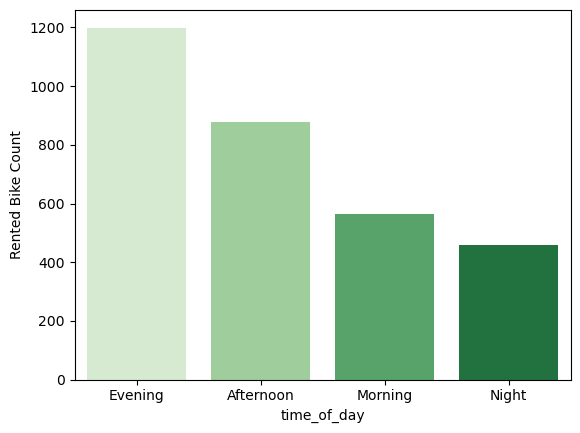

In [20]:
#plot the demand based on timings 
sns.barplot(y = 'Rented Bike Count',x='time_of_day',data = bike_rents, palette = 'Greens')
plt.show()

We divided a day into 4 phases, Morning, Afternoon, Evening and Night with Evening hours being the most popular and Night hours being the least popular.

In [21]:
#create holiday status column for hypothesis testing
df['Holiday_status'] = df['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0)
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Seasons,Holiday,Functioning Day,month,year,day_name,day_number,Weekend,time_of_day,Holiday_status
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,Winter,No Holiday,Yes,December,2017,Friday,5,0,Night,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,Winter,No Holiday,Yes,December,2017,Friday,5,0,Night,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,Winter,No Holiday,Yes,December,2017,Friday,5,0,Night,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,Winter,No Holiday,Yes,December,2017,Friday,5,0,Night,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,Winter,No Holiday,Yes,December,2017,Friday,5,0,Night,0


# Hypothesis Testing

#Q1 Does Rented Bike Count vary with change in seasons? 

#Q2 Does Rented Bike Count vary change in phase of a day?

#Q3 Does Rented Bike Count vary with Weekend?

#Q4 Does Rented Bike Count vary with a day being a holiday or non-holiday?


#Q1 Ho : Rented Bike Count is equal for all the seasons.
    H1 : Rented Bike Count is not equal for all the seasons.
    
#Q2 Ho: Rented Bike Count is equal in every phase of the day.
    H1: Rented Bike Count is not equal in every phase of the day..
    
#Q3 Ho: Rented Bike Count is equal for Weekday and Weekend.
    H1: Rented Bike Count is not equal for Weekday and Weekend.
    
#Q4 Ho: Rented Bike Count is not affected by a holiday.
    H1: Rented Bike Count is affected by a holiday.

In [22]:
#conduct hypothesis test using anova 
import scipy.stats as stats

#Testing Hypothesis 1
anova_result = stats.f_oneway(df['Rented Bike Count'][df['Seasons'] == 'Summer'],
                               df['Rented Bike Count'][df['Seasons'] == 'Autumn'],
                               df['Rented Bike Count'][df['Seasons'] == 'Winter'],
                              df['Rented Bike Count'][df['Seasons'] == 'Spring']
                             )

# Print the ANOVA results
print("ANOVA F-value for Q1:", anova_result.statistic)
print("ANOVA p-value for Q1:", anova_result.pvalue)

#Testing Hypothesis 2
anova_result = stats.f_oneway(df['Rented Bike Count'][df['time_of_day'] == 'Morning'],
                               df['Rented Bike Count'][df['time_of_day'] == 'Afternoon'],
                              df['Rented Bike Count'][df['time_of_day'] == 'Evening'],
                              df['Rented Bike Count'][df['time_of_day'] == 'Night']
                               
                             )

# Print the ANOVA results
print("ANOVA F-value for Q2:", anova_result.statistic)
print("ANOVA p-value for Q2:", anova_result.pvalue)


# Testing Hypothesis 3 
t_statistic, p_value = stats.ttest_ind(df['Rented Bike Count'][df['Weekend'] == 0],df['Rented Bike Count'][df['Weekend'] == 1])
 
                             
# Print the test results
print("t statistic for Q3", t_statistic)
print("p-value for Q3:",p_value)

# Testing Hypothesis 4
t_statistic, p_value = stats.ttest_ind(df['Rented Bike Count'][df['Holiday_status'] == 0],df['Rented Bike Count'][df['Holiday_status'] == 1])

# Print the test results
print("t statistic for Q4", t_statistic)
print("p-value for Q4:",p_value)



ANOVA F-value for Q1: 776.4678149879504
ANOVA p-value for Q1: 0.0
ANOVA F-value for Q2: 605.3636720223308
ANOVA p-value for Q2: 0.0
t statistic for Q3 3.4150448192415523
p-value for Q3: 0.0006406092926737232
t statistic for Q4 6.7874340454159166
p-value for Q4: 1.2156443235024855e-11


# Conclusions:
from the hypothesis tests, we conclude the following
1) Rented Bike Counts vary with change in seasons.
2) Rented Bike Counts vary with phases in a day.
3) Rented Bike Counts vary on weekdays and weekends.
4) Rented Bike Counts vary on holidays and non-holidays.

# Exploratory Data Analysis (EDA)

In [23]:
# no bike rentals on non-functioning days
df[df['Functioning Day']=='No']

# #lets drop those from our data frame
df1 = df[~(df['Functioning Day']=='No')]
print(df1.shape)


(8465, 21)


    Hour  Rented Bike Count
0      0         561.457386
1      1         441.923295
2      2         312.769886
3      3         210.840909
4      4         137.488636
5      5         144.218750
6      6         298.184659
7      7         626.606232
8      8        1050.229462
9      9         667.943343
10    10         545.764873
11    11         621.277620
12    12         723.218130
13    13         758.172805
14    14         784.620397
15    15         857.373938
16    16         962.257790
17    17        1177.212465
18    18        1554.016997
19    19        1235.776204
20    20        1105.303116
21    21        1066.512748
22    22         954.167139
23    23         693.940510


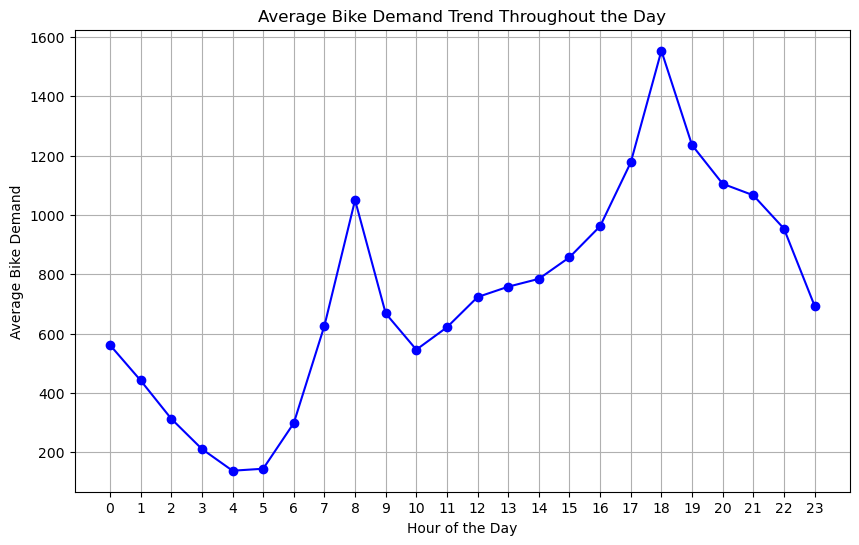

In [24]:
#check bike rentals based on timings

#grouping the data based on hourly averages
hourly_demand = df1.groupby('Hour')['Rented Bike Count'].mean().reset_index()
print(hourly_demand)

# Plotting the trend chart
plt.figure(figsize=(10, 6))
plt.plot(hourly_demand['Hour'], hourly_demand['Rented Bike Count'], marker='o', linestyle='-', color='b')
plt.title('Average Bike Demand Trend Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Bike Demand')
plt.xticks(hourly_demand['Hour'])  # Show all hours on the x-axis
plt.grid(True)
plt.show()


We saw above that evening hours were the most popular for bike rentals, using the lineplot above, we can observe the demand peaking at around 6pm in the evening, this can be attributed to people commuting home from work or just recreation during evening hours, also the demand for bike rentals keeps declining during night hours.

    Hour Seasons  Rented Bike Count
0      0  Autumn         709.437500
1      0  Spring         481.088889
2      0  Summer         899.065217
3      0  Winter         165.177778
4      1  Autumn         552.500000
..   ...     ...                ...
91    22  Winter         225.133333
92    23  Autumn         828.728395
93    23  Spring         622.955556
94    23  Summer        1153.902174
95    23  Winter         173.433333

[96 rows x 3 columns]


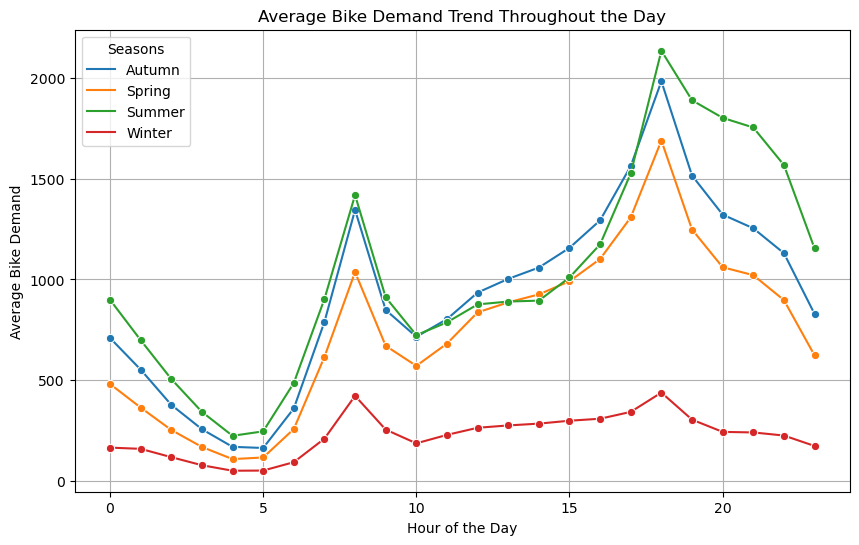

In [25]:
#check peak rental timing based on seasons
hs_demand = df1.groupby(['Hour','Seasons'])['Rented Bike Count'].mean().reset_index()
print(hs_demand)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Hour', y='Rented Bike Count', data=hs_demand, marker='o', color='b',hue='Seasons')
plt.title('Average Bike Demand Trend Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Bike Demand')
plt.grid(True)
plt.show()

The demand for bikes throughout the day follows a similar pattern that we discovered above with Evening hours being the most popular followed by a spike in demand during early morning hours, for the winter season, we observe that the demand overall stays pretty much the same throughout the day with a slight increase in demand during evenings and early mornings although the difference is very less compared to other seasons.

     Hour   day_name  Rented Bike Count
0       0     Friday         549.882353
1       0     Monday         459.576923
2       0   Saturday         690.100000
3       0     Sunday         651.372549
4       0   Thursday         540.860000
..    ...        ...                ...
163    23   Saturday         749.784314
164    23     Sunday         579.784314
165    23   Thursday         689.580000
166    23    Tuesday         649.895833
167    23  Wednesday         702.340000

[168 rows x 3 columns]


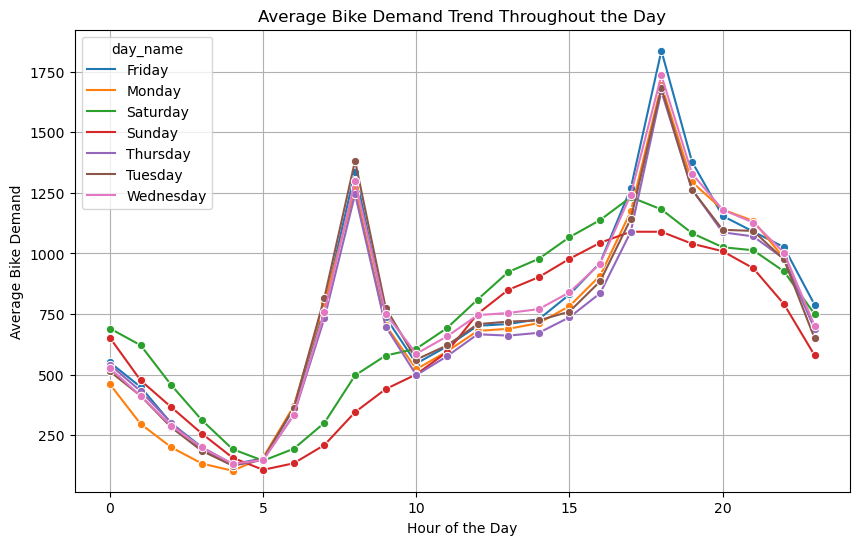

In [26]:
#check peak rental demand based on day of week
hd_demand = df1.groupby(['Hour','day_name'])['Rented Bike Count'].mean().reset_index()
print(hd_demand)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Hour', y='Rented Bike Count', data=hd_demand, marker='o', color='b',hue='day_name')
plt.title('Average Bike Demand Trend Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Bike Demand')
plt.grid(True)
plt.show()

The above plot confirms that there is less demand on weekends compared to weekdays

# Analysis wrt Temperature column

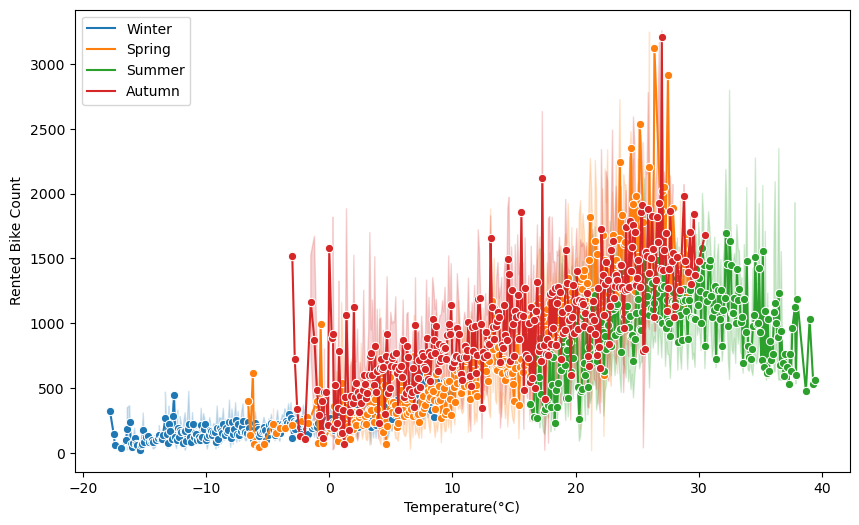

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Temperature(°C)', y='Rented Bike Count', data=df1, hue='Seasons', marker='o')
plt.legend(loc='upper left')
plt.show()

Higher temperatures see more bike rentals explaining the higher demands during summer, and lower demands during winter.

# Analysis wrt Humidity column

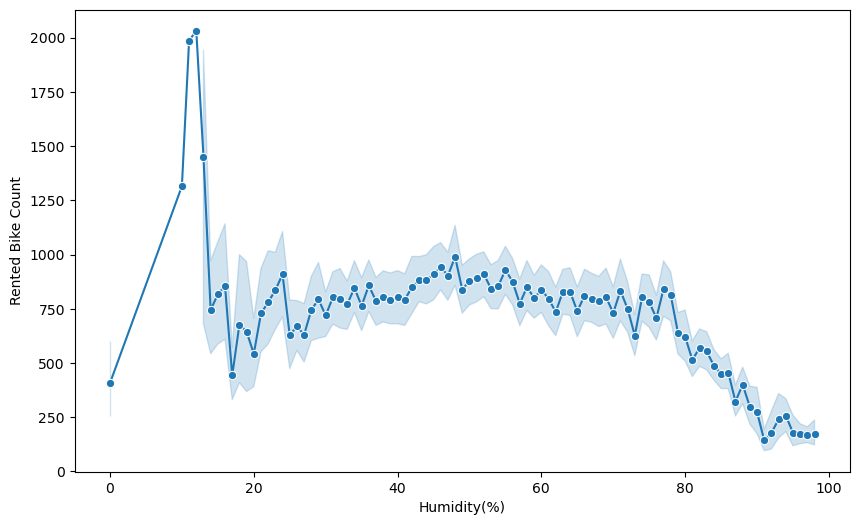

In [28]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Humidity(%)', y='Rented Bike Count', data=df1, marker='o')
plt.show()

# Analysis wrt Wind Speed column

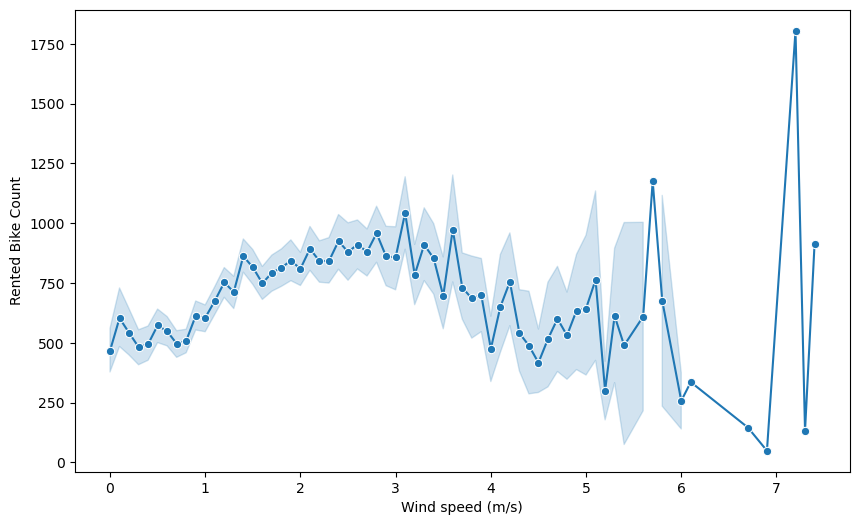

In [29]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Wind speed (m/s)', y='Rented Bike Count', data=df1, marker='o')
plt.show()

# Analysis wrt Visibility column

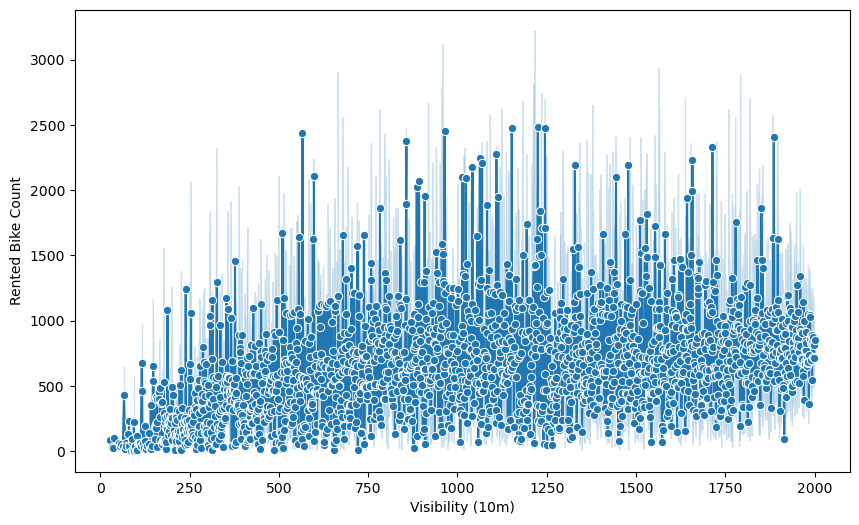

In [30]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Visibility (10m)', y='Rented Bike Count', data=df1, marker='o')
plt.show()

# Analysis wrt Solar Radiation column

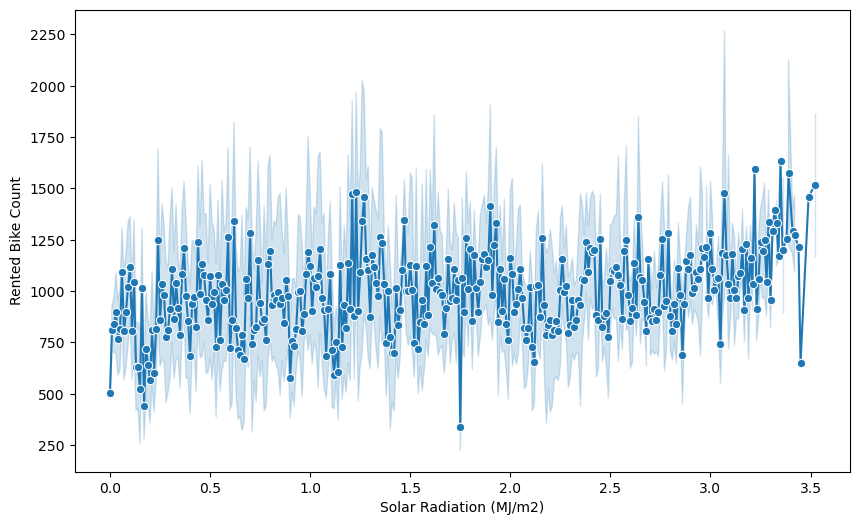

In [31]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Solar Radiation (MJ/m2)', y='Rented Bike Count', data=df1, marker='o')
plt.show()

# Analysis wrt Rainfall column

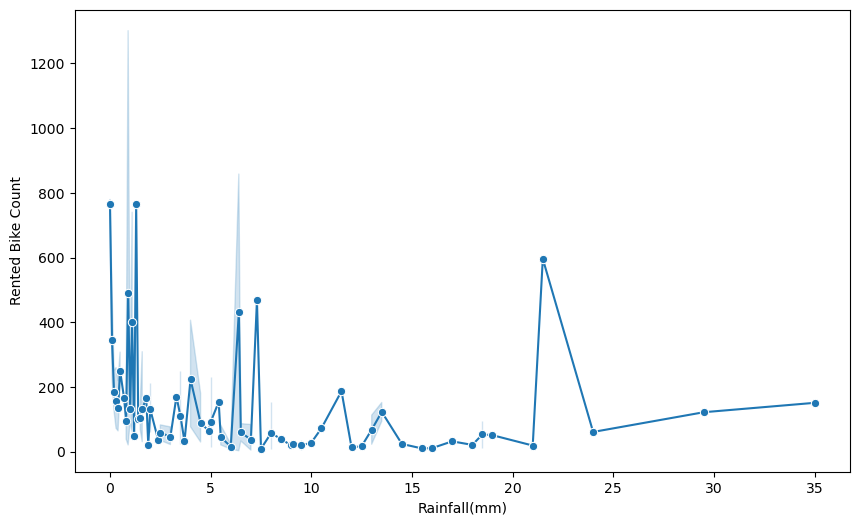

In [32]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Rainfall(mm)', y='Rented Bike Count', data=df1, marker='o')
plt.show()

# Analysis wrt Snowfall column

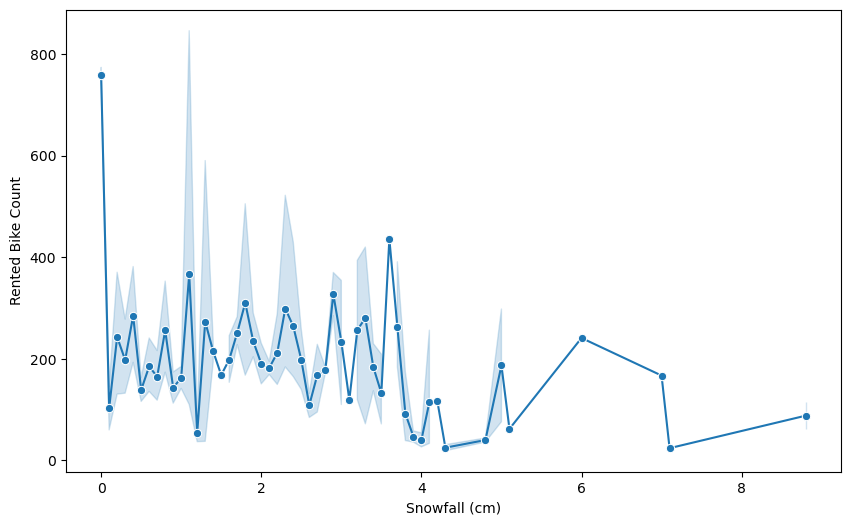

In [33]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Snowfall (cm)', y='Rented Bike Count', data=df1, marker='o')
plt.show()

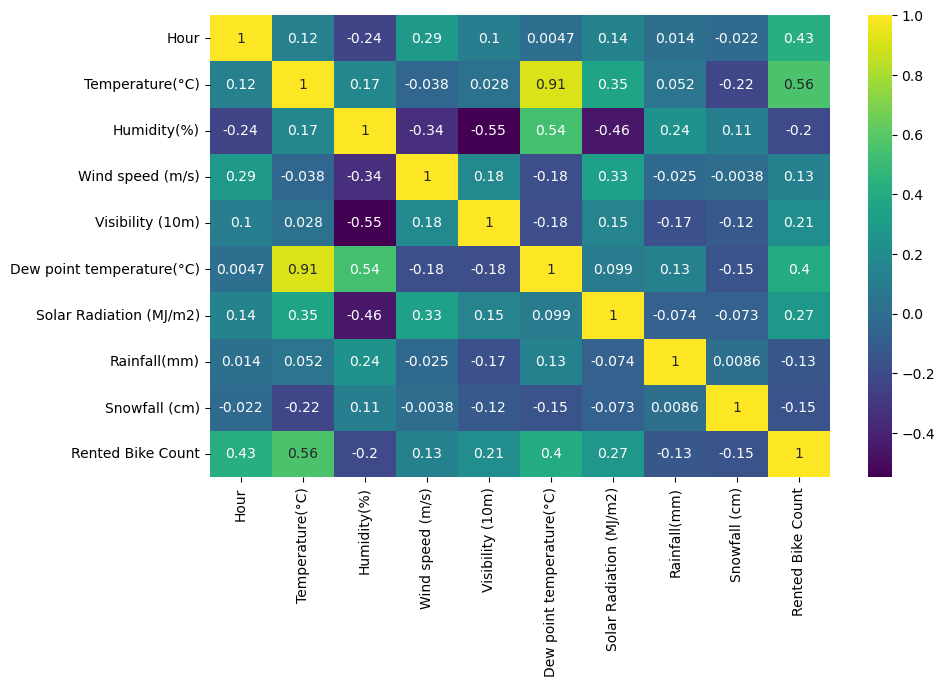

In [34]:
# Check the correlation between variables
numerical_var = ['Hour','Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)','Rented Bike Count']
plt.figure(figsize=(10,6))
sns.heatmap(df1[numerical_var].corr(),annot=True,cmap = 'viridis')
plt.show()

There is a significantly high correlation between Temperature and Dew point temperature, we can drop dew point temperature as it has a slightly lesser correlation to Rented Bike Count than Temperature.

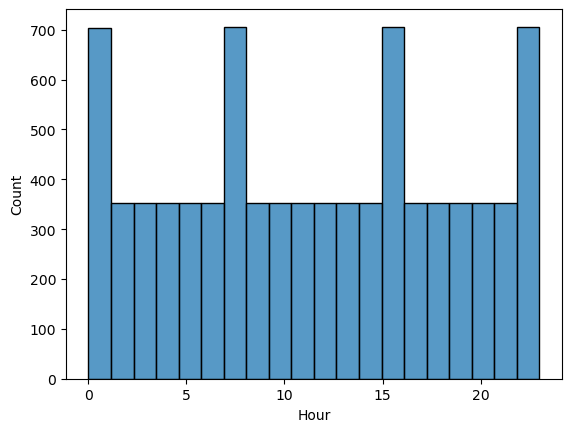

<Figure size 1000x600 with 0 Axes>

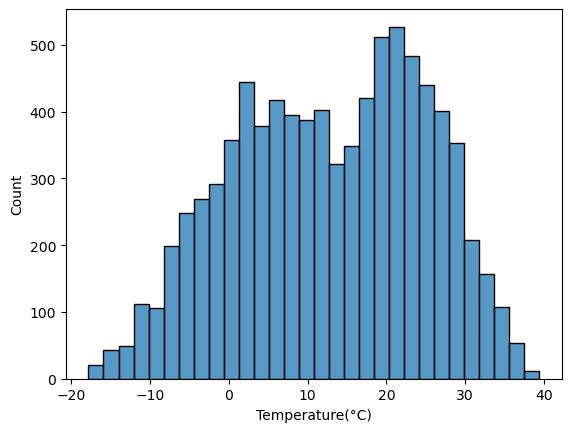

<Figure size 1000x600 with 0 Axes>

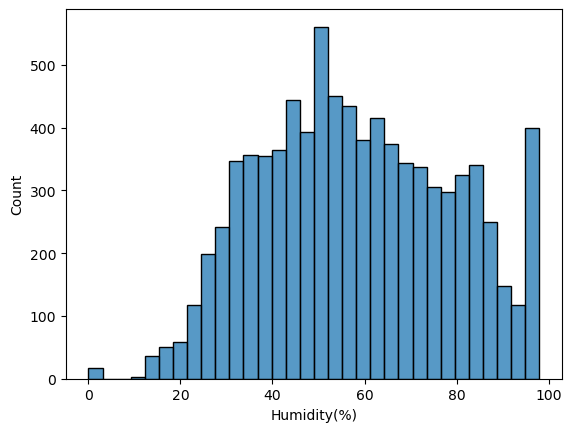

<Figure size 1000x600 with 0 Axes>

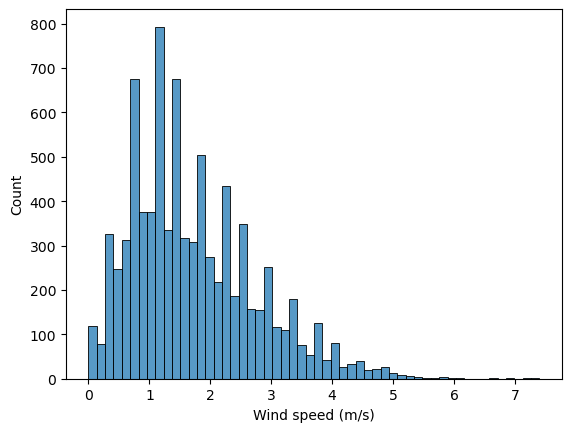

<Figure size 1000x600 with 0 Axes>

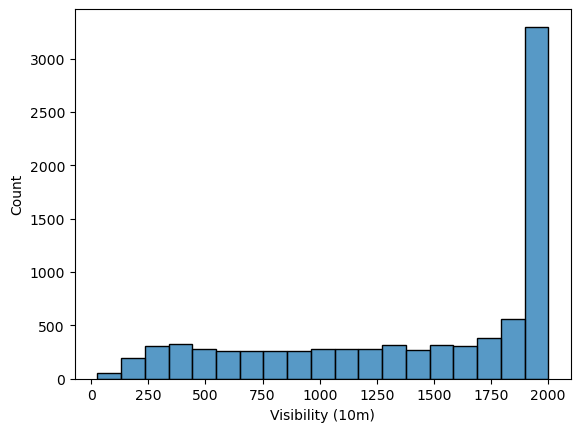

<Figure size 1000x600 with 0 Axes>

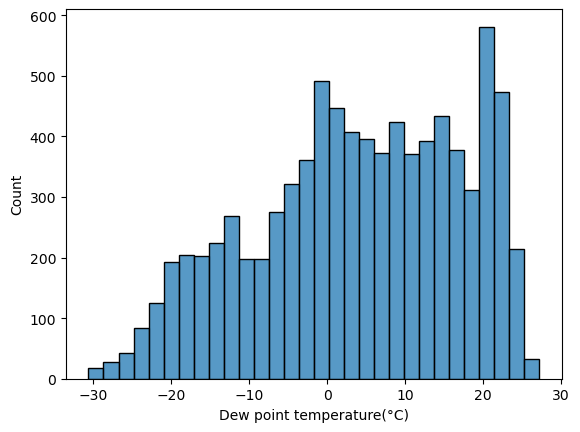

<Figure size 1000x600 with 0 Axes>

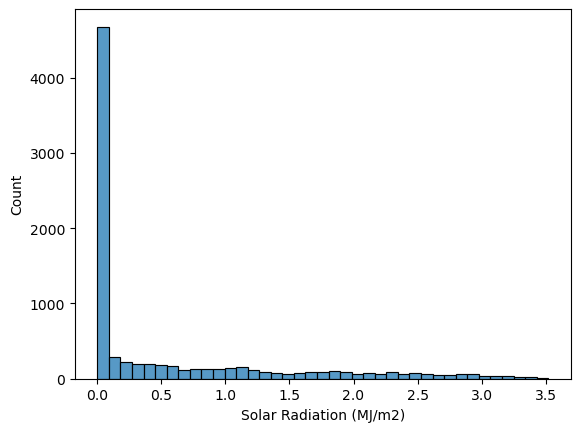

<Figure size 1000x600 with 0 Axes>

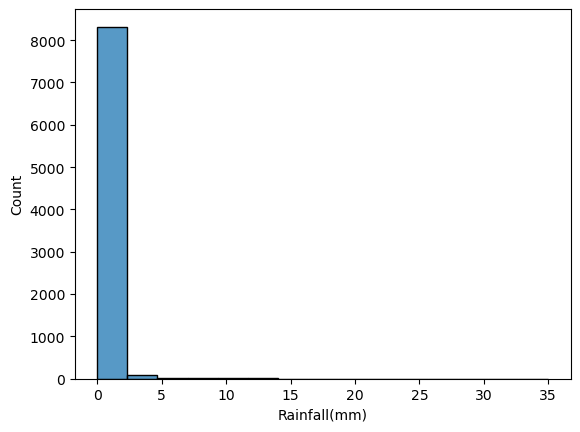

<Figure size 1000x600 with 0 Axes>

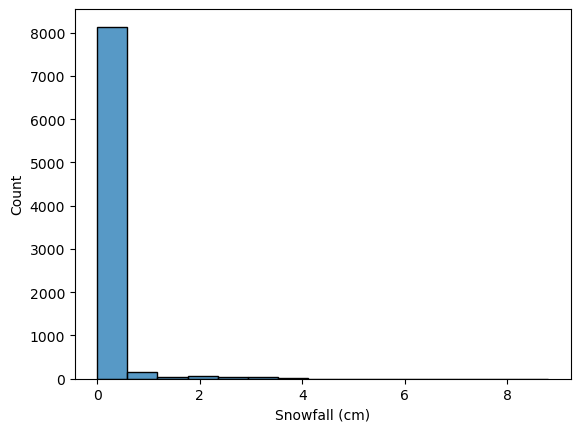

<Figure size 1000x600 with 0 Axes>

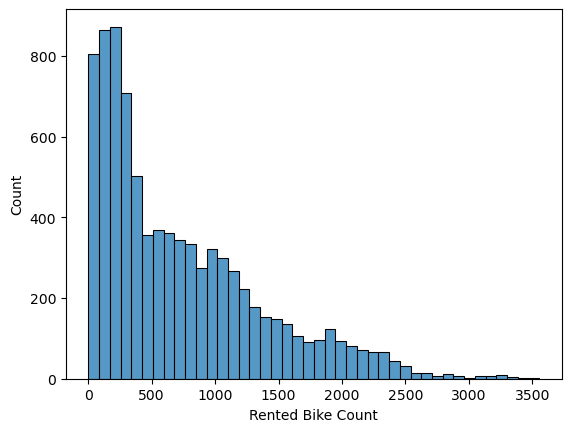

<Figure size 1000x600 with 0 Axes>

In [35]:
#check distributions of numerical columns
for i in numerical_var:
    sns.histplot(x=i,data = df1)
    plt.figure(figsize=(10,6))
    plt.show()

We can see some of our columns are heavily skewed towards the right indicating the presence of outliers.

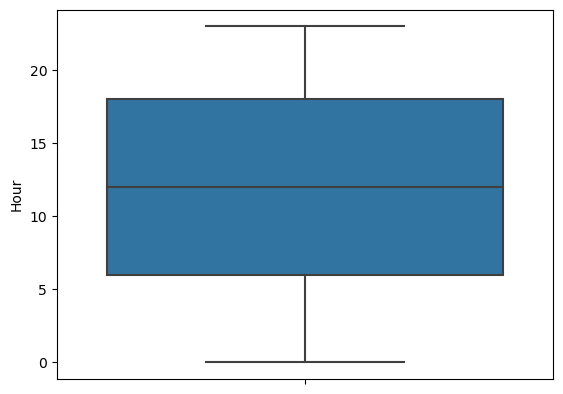

<Figure size 1000x600 with 0 Axes>

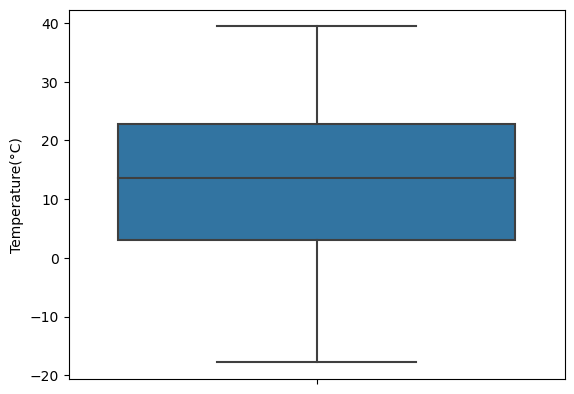

<Figure size 1000x600 with 0 Axes>

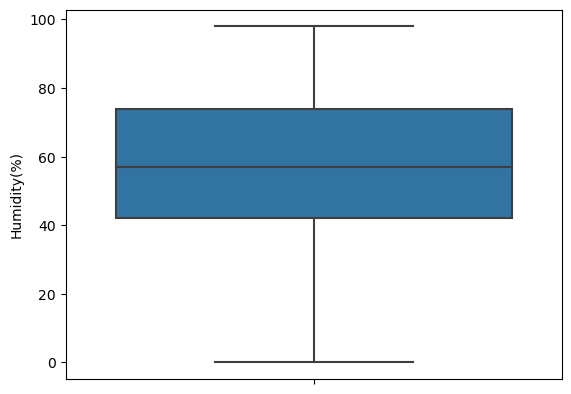

<Figure size 1000x600 with 0 Axes>

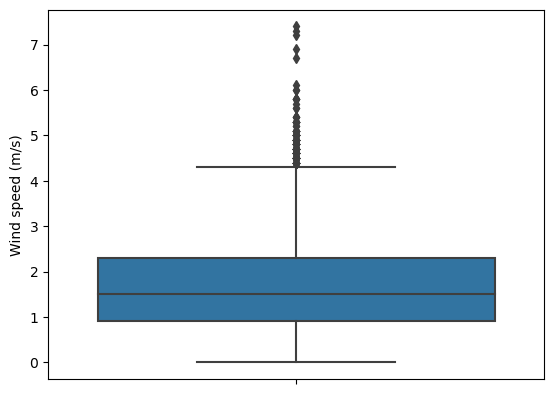

<Figure size 1000x600 with 0 Axes>

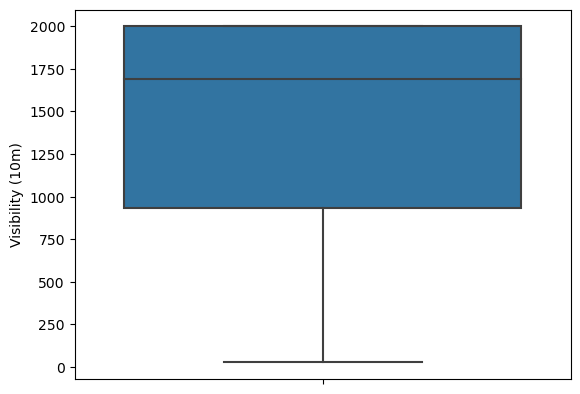

<Figure size 1000x600 with 0 Axes>

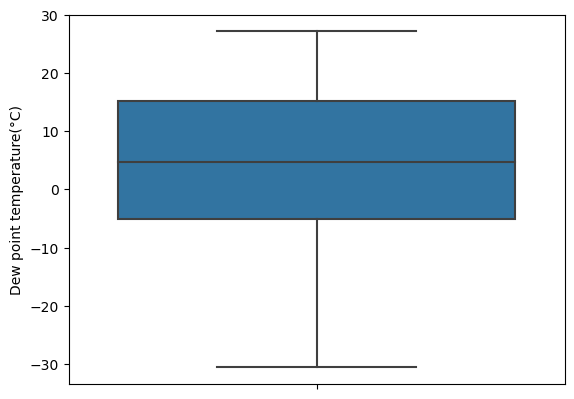

<Figure size 1000x600 with 0 Axes>

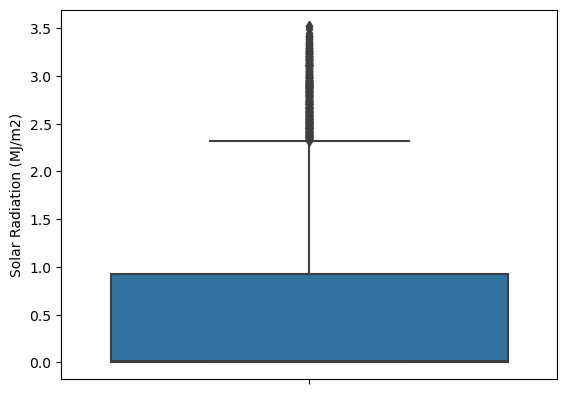

<Figure size 1000x600 with 0 Axes>

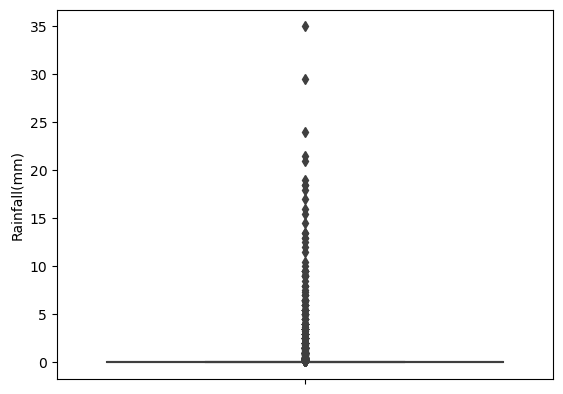

<Figure size 1000x600 with 0 Axes>

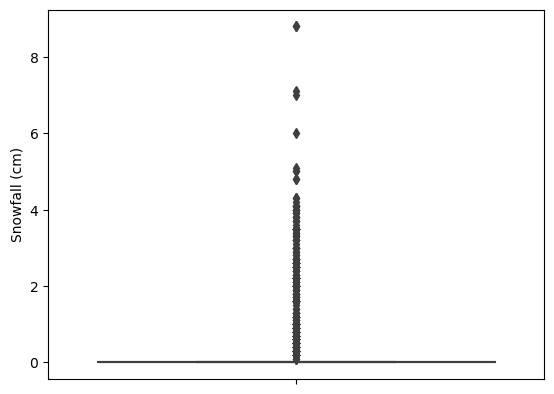

<Figure size 1000x600 with 0 Axes>

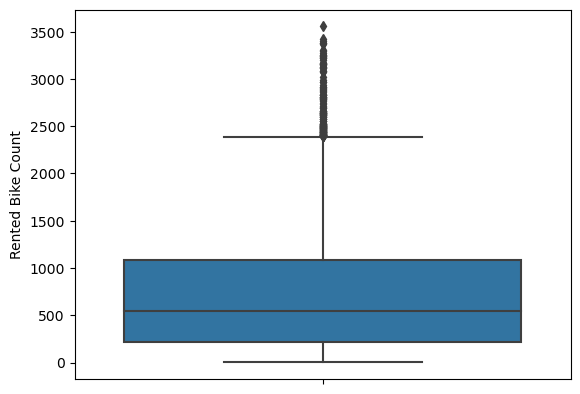

<Figure size 1000x600 with 0 Axes>

In [36]:
for i in numerical_var:
    sns.boxplot(y=i,data = df1)
    plt.figure(figsize=(10,6))
    plt.show()

The boxplots indicate the presence of outliers.

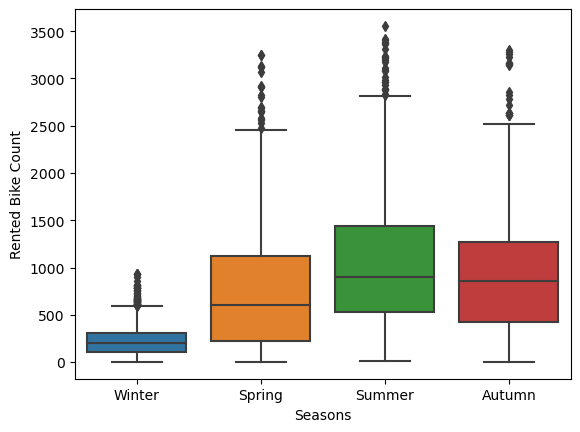

In [37]:
#boxplot for target variable --> Rented Bike Count
sns.boxplot(y='Rented Bike Count',data = df1,x = 'Seasons')
plt.show()

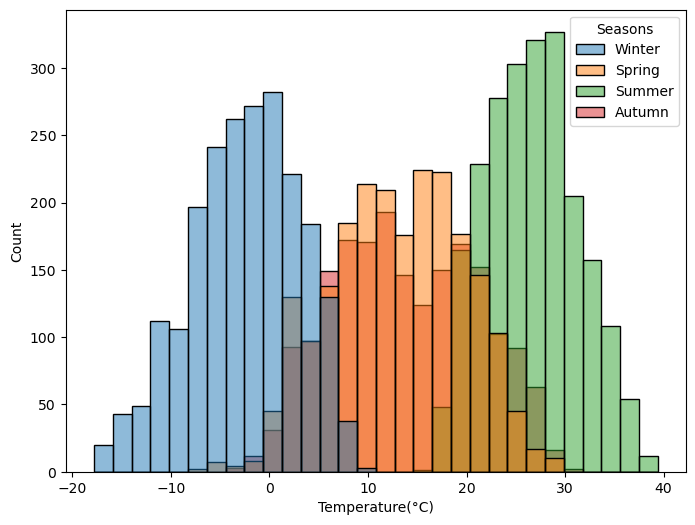

In [38]:
#plot temperature distribution
plt.figure(figsize=(8,6))
sns.histplot(x = 'Temperature(°C)',data = df1,hue='Seasons')
plt.show()

In [39]:
#drop columns that arent useful anymore for analysis
df1.drop(['day_name','day_number','Holiday','Functioning Day'],axis = 1,inplace=True)
df1.head()

/var/folders/v9/vhgfpqqn68d5z4pqh22hxlf40000gn/T/ipykernel_96165/4059848271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['day_name','day_number','Holiday','Functioning Day'],axis = 1,inplace=True)


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,month,year,Weekend,time_of_day,Holiday_status
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,December,2017,0,Night,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,December,2017,0,Night,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,December,2017,0,Night,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,December,2017,0,Night,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,December,2017,0,Night,0


In [40]:
#lets perform one hot encoding for day_name column
df1 = pd.get_dummies(data = df1, columns = ['time_of_day','Seasons'],dtype = int)
df1.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Weekend,Holiday_status,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1


# Performing Target Ordinal encoding on month column

The months have been given labels from 0 to 11 but the order of labels is based on the mean bike rentals of that particular month, more popular months get more weightage compared to less popular months

In [41]:
#encoding the month column target ordinal encoding
month_rentals = df1.groupby('month')['Rented Bike Count'].mean().sort_values(ascending = True).index

month_labels = {k:i for i,k in enumerate(month_rentals,0)}

In [42]:
month_labels

{'January': 0,
 'February': 1,
 'December': 2,
 'March': 3,
 'November': 4,
 'April': 5,
 'August': 6,
 'October': 7,
 'May': 8,
 'July': 9,
 'September': 10,
 'June': 11}

In [43]:
df1['month_labels'] = df1['month'].map(month_labels)
df1.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Holiday_status,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,month_labels
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,0,0,0,0,1,0,0,0,1,2
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,0,0,0,0,1,0,0,0,1,2
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,0,0,0,0,1,0,0,0,1,2
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,0,0,0,0,1,0,0,0,1,2
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,0,0,0,0,1,0,0,0,1,2


In [44]:
#drop Date, Dew point temperature and Functioning Day column
df1.drop(['Date','Dew point temperature(°C)','year','month'],axis =1 ,inplace = True)
df1.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Weekend,Holiday_status,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,month_labels
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,1,2
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,1,2
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,1,2
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,1,2
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,1,2


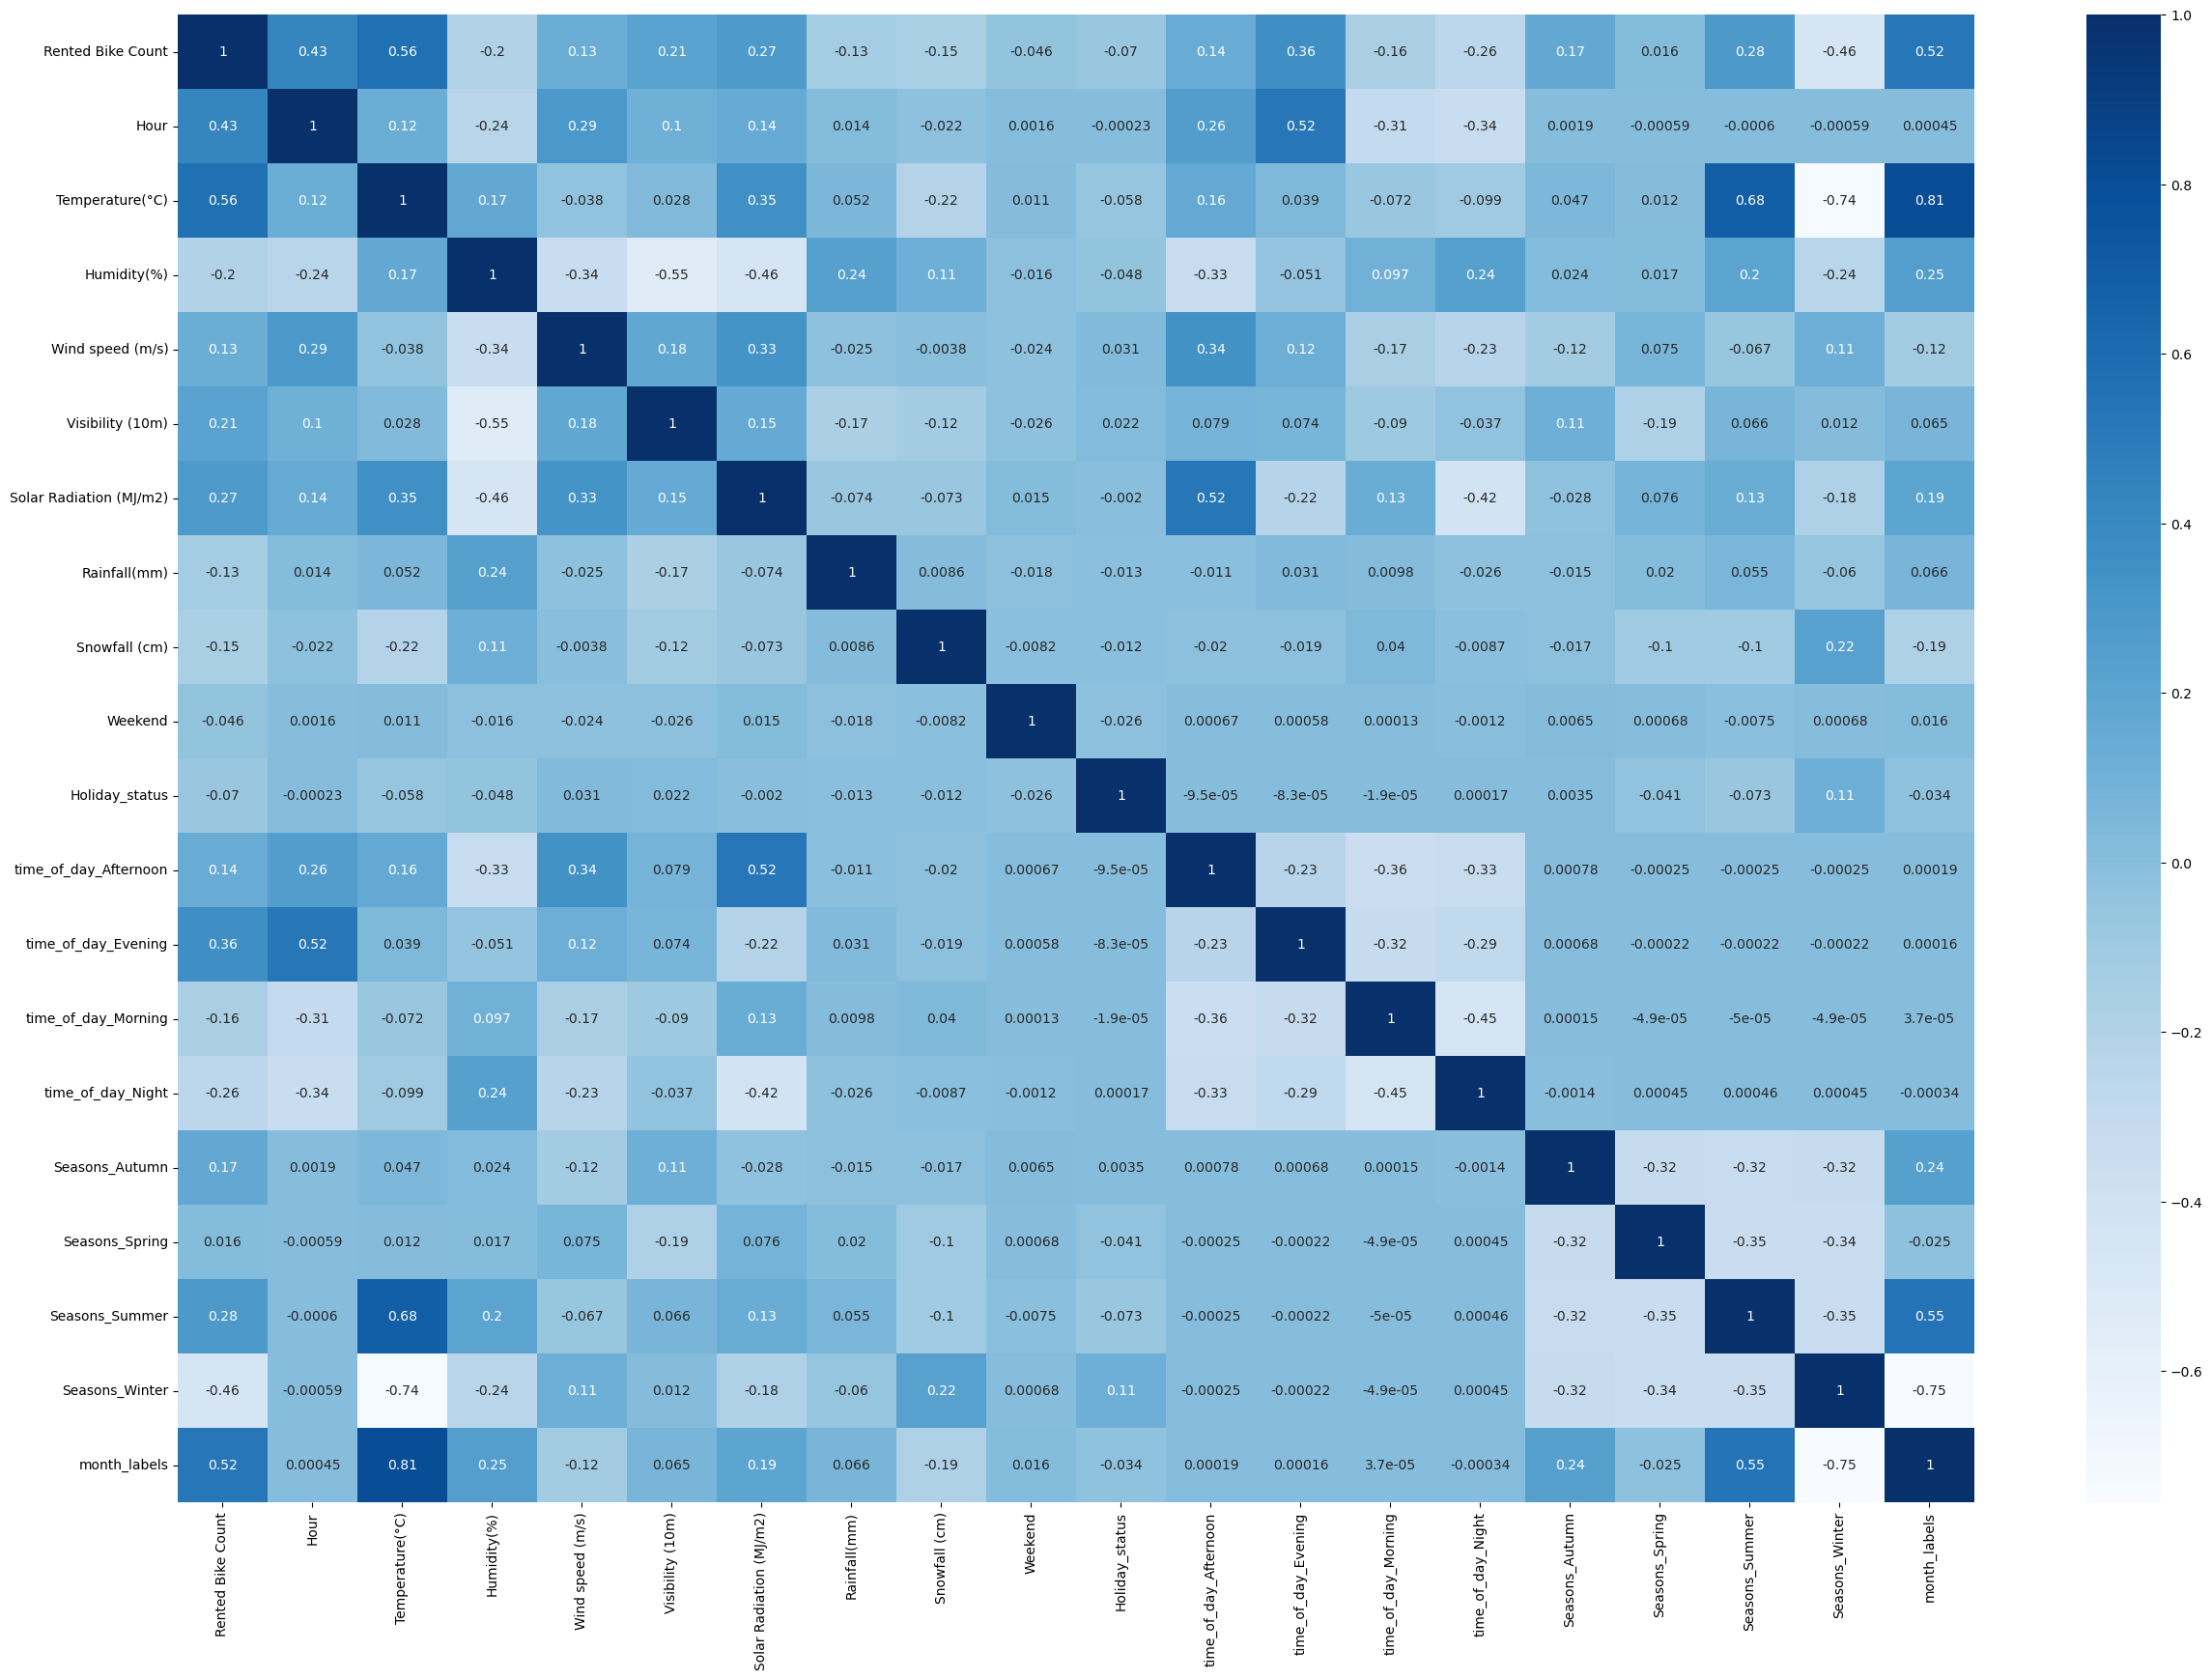

In [45]:
plt.figure(figsize=(30,20))
sns.heatmap(df1.corr(),annot = True,cmap='Blues')
plt.show()

We see some cases of multicollinearity in the data, lets resolve it using VIF

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data_frame):
    """
    Calculate VIF for each feature in a DataFrame.

    Parameters:
    - data_frame: pandas DataFrame containing the features.

    Returns:
    - vif_data: DataFrame with feature names and their corresponding VIF values.
    """
    # Create a DataFrame to store the results
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]

    return vif_data

calculate_vif(df1.drop('Rented Bike Count',axis=1))

/Users/kumarbaibhav/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
0,Hour,1.779416
1,Temperature(°C),6.314406
2,Humidity(%),2.755062
3,Wind speed (m/s),1.367406
4,Visibility (10m),1.741483
5,Solar Radiation (MJ/m2),2.796772
6,Rainfall(mm),1.077702
7,Snowfall (cm),1.115024
8,Weekend,1.006022
9,Holiday_status,1.031278


In [47]:
df1.corr()['Rented Bike Count']

Rented Bike Count          1.000000
Hour                       0.425256
Temperature(°C)            0.562740
Humidity(%)               -0.201973
Wind speed (m/s)           0.125022
Visibility (10m)           0.212323
Solar Radiation (MJ/m2)    0.273862
Rainfall(mm)              -0.128626
Snowfall (cm)             -0.151611
Weekend                   -0.046360
Holiday_status            -0.070070
time_of_day_Afternoon      0.142851
time_of_day_Evening        0.356134
time_of_day_Morning       -0.158781
time_of_day_Night         -0.255181
Seasons_Autumn             0.165333
Seasons_Spring             0.015580
Seasons_Summer             0.282001
Seasons_Winter            -0.458920
month_labels               0.521092
Name: Rented Bike Count, dtype: float64

In [48]:
#drop month_label, season_winter, year_2017,holiday column to reduce multicollinearity
df1.drop(['time_of_day_Afternoon','time_of_day_Evening','time_of_day_Morning','time_of_day_Night','Seasons_Autumn','Seasons_Spring','Seasons_Summer','Seasons_Winter'],axis =1 ,inplace = True)

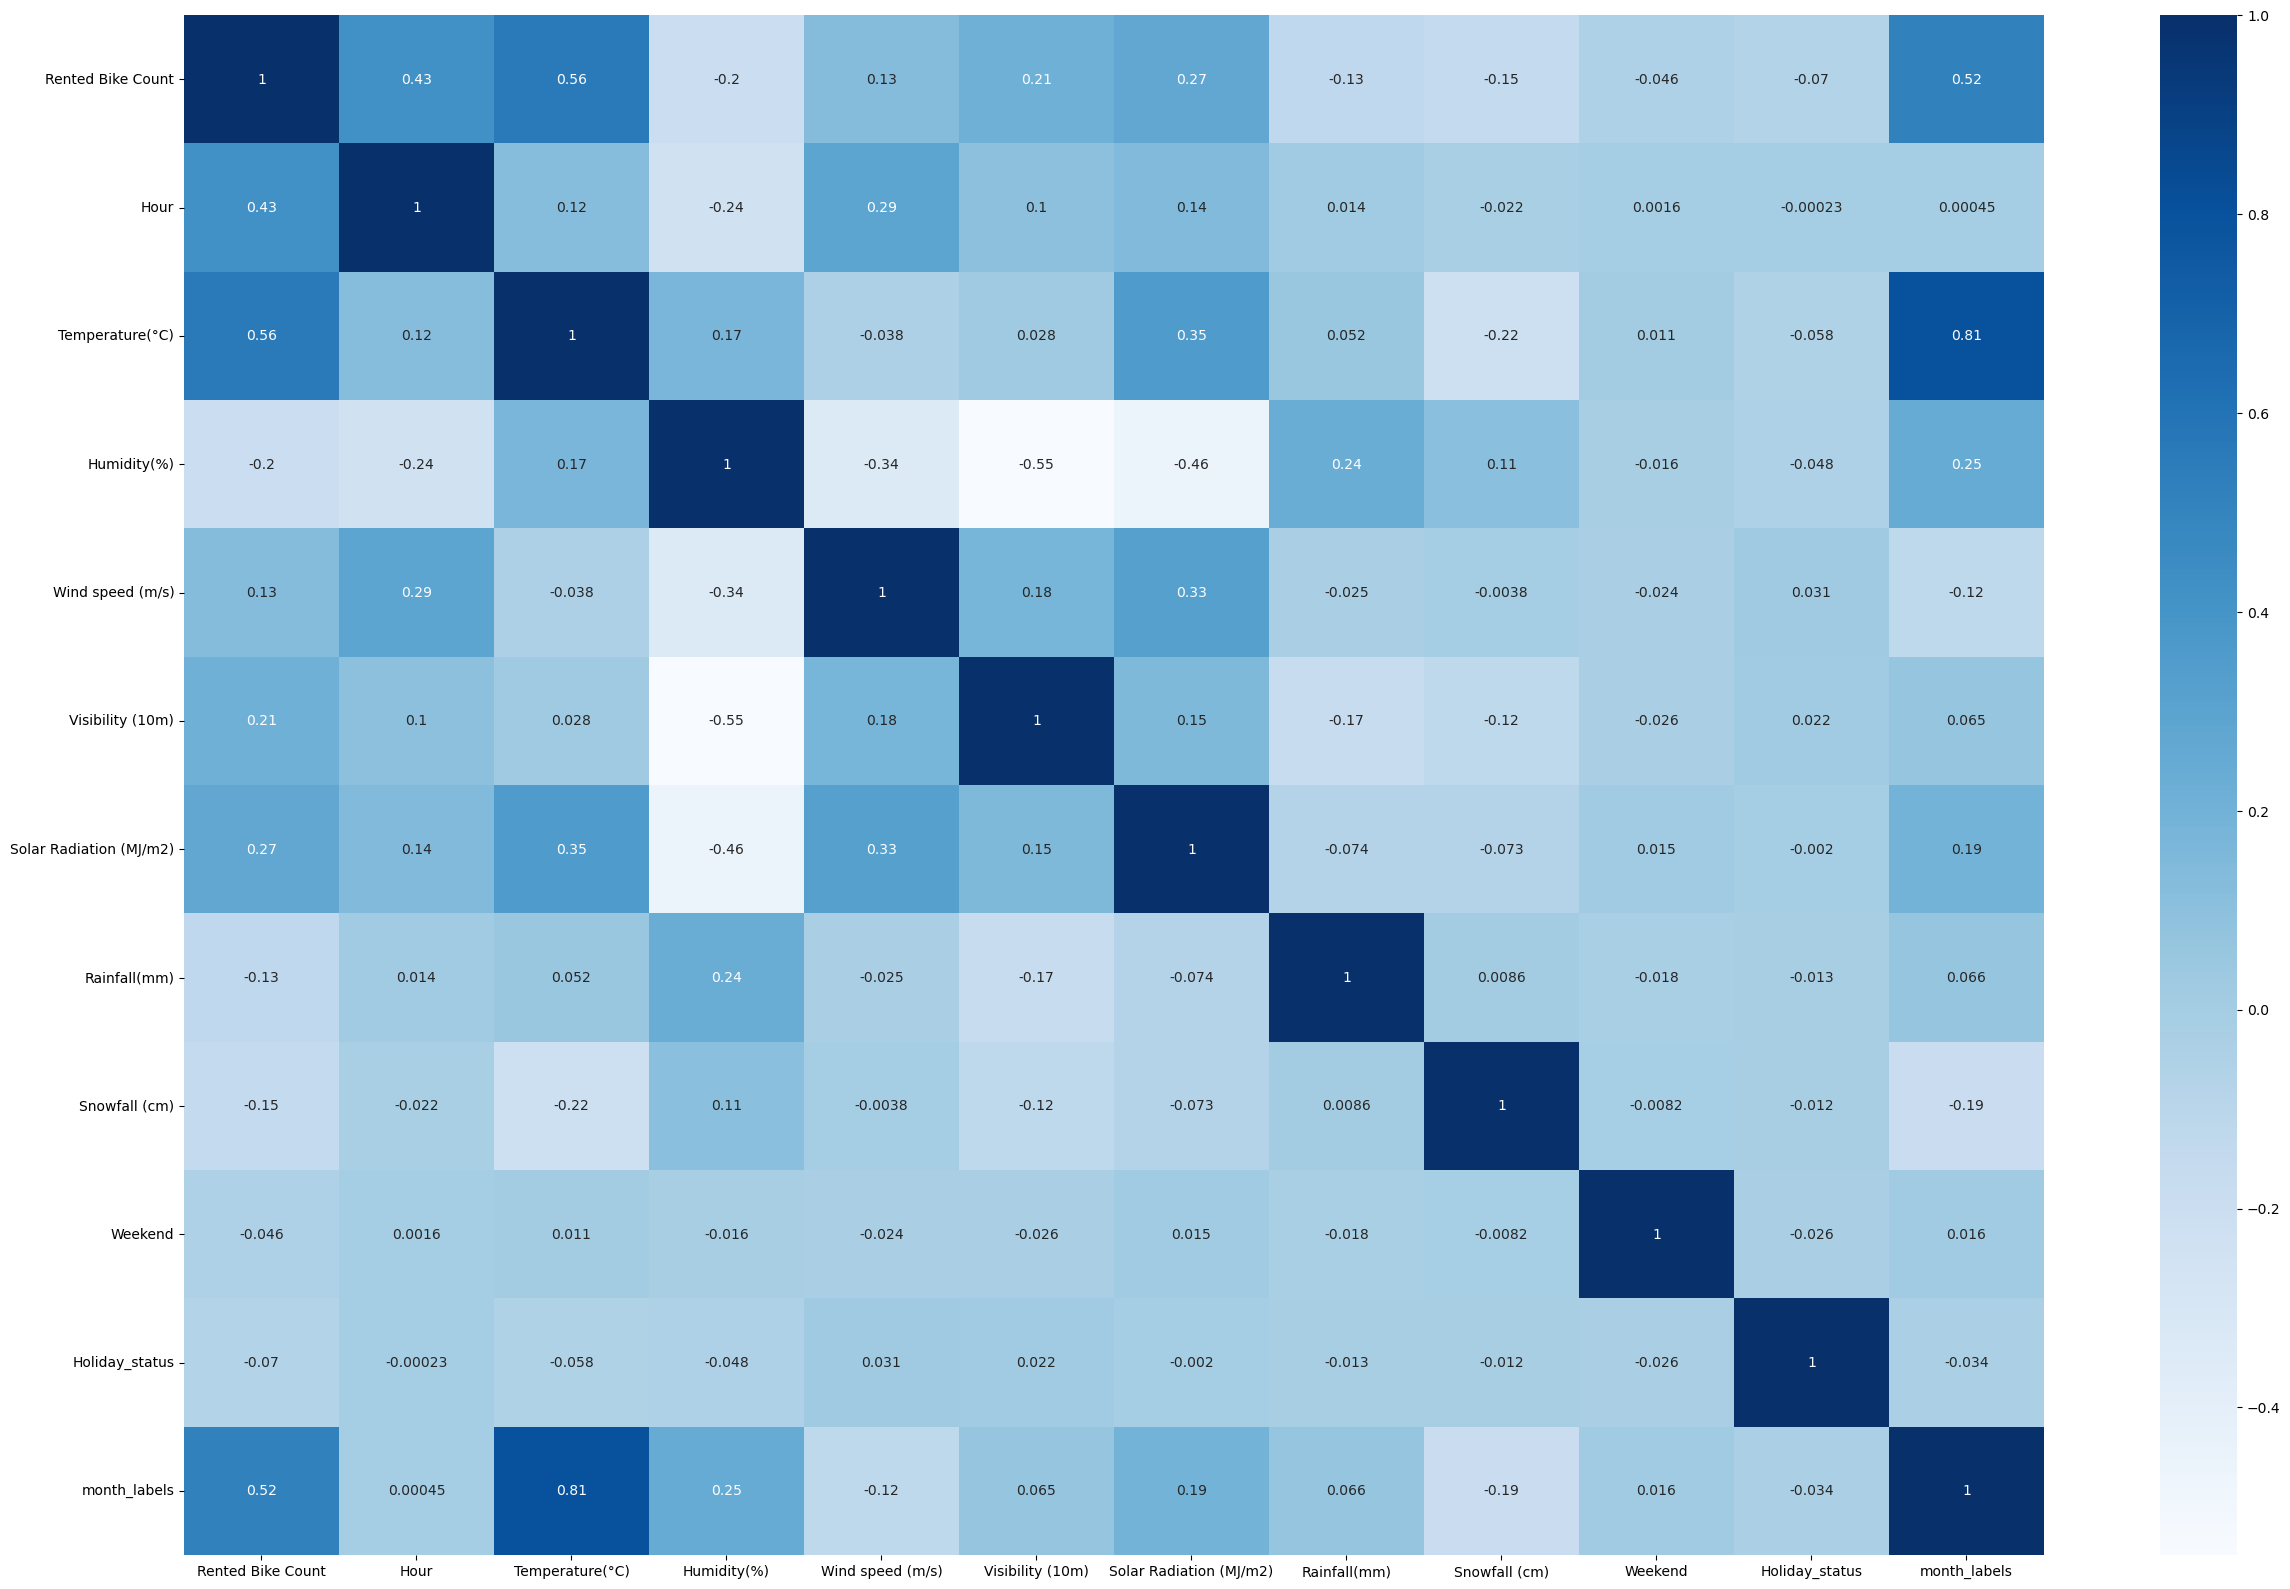

In [49]:
plt.figure(figsize=(30,20))
sns.heatmap(df1.corr(),annot = True,cmap='Blues')
plt.show()

In [50]:
calculate_vif(df1.drop('Rented Bike Count',axis=1))

,Variable,VIF
0,Hour,3.987251
1,Temperature(°C),7.173660
2,Humidity(%),5.994200
3,Wind speed (m/s),4.640612
4,Visibility (10m),5.284221
5,Solar Radiation (MJ/m2),2.242897
6,Rainfall(mm),1.081531
7,Snowfall (cm),1.125320
8,Weekend,1.387679
9,Holiday_status,1.055542


In [51]:
df1.drop('month_labels',axis =1,inplace = True)
df1.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Weekend,Holiday_status
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0


In [52]:
calculate_vif(df1.drop('Rented Bike Count',axis=1))

,Variable,VIF
0,Hour,3.952171
1,Temperature(°C),3.173134
2,Humidity(%),4.990160
3,Wind speed (m/s),4.623300
4,Visibility (10m),4.754316
5,Solar Radiation (MJ/m2),2.242889
6,Rainfall(mm),1.081234
7,Snowfall (cm),1.123376
8,Weekend,1.386644
9,Holiday_status,1.054432


We have dropped the columns that had a VIF significantly greater than 5.

In [53]:
#check skewness of numerical variables
skewness = stats.skew(df1[['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)','Rented Bike Count']])
skewness


array([-0.17451889,  0.06863681,  0.89406304, -0.69518295,  1.50979745,
       14.61433103,  8.2913607 ,  1.13949809])

The square root transform transforms the Rented Bike Count column better than the log transform as indicated by the skewness value of 0.34, this enables us to handle outliers in the Rented Bike Count column.

1.0667251402580196
6.416821202040681
5.703839531586511


/Users/kumarbaibhav/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/kumarbaibhav/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/kumarbaibhav/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

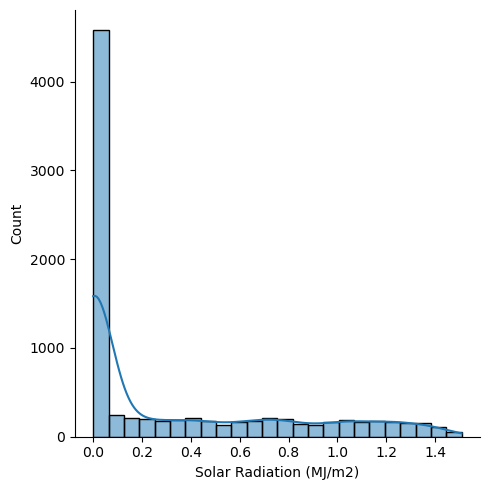

<Figure size 800x600 with 0 Axes>

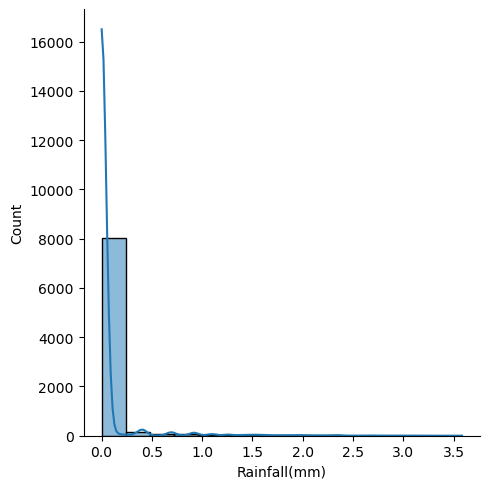

<Figure size 800x600 with 0 Axes>

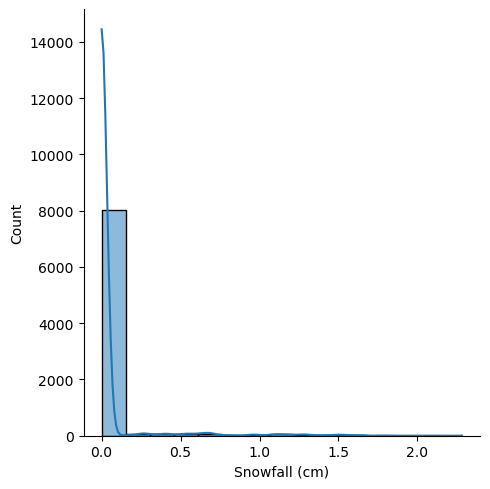

In [54]:
#apply transformations to features

# log transformation
transform_var = ['Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
for i in transform_var:
    plt.figure(figsize=(8,6))
    sns.displot(np.log1p(df1[i]),kde=True)
    print(stats.skew(np.log1p(df1[i])))


0.8108386855244403
6.589486835686788
5.21444649591531


/Users/kumarbaibhav/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/kumarbaibhav/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/kumarbaibhav/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

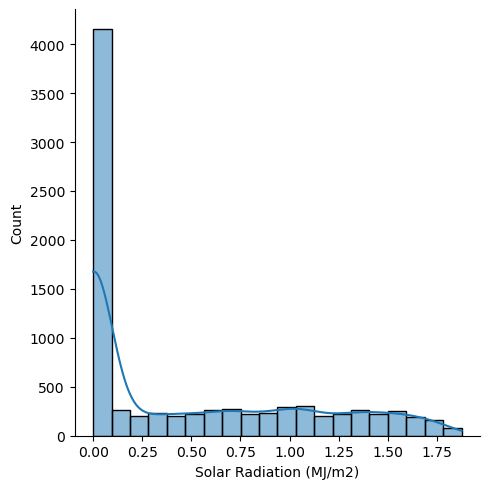

<Figure size 1000x600 with 0 Axes>

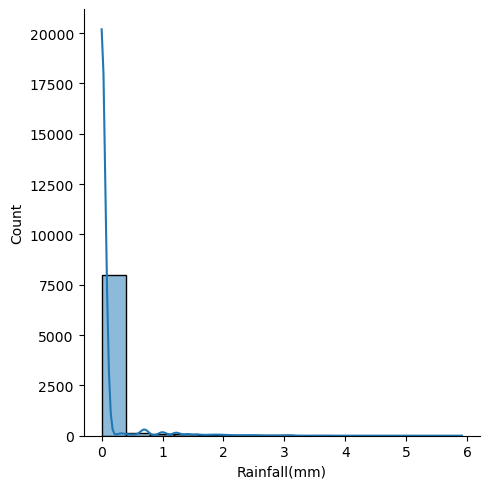

<Figure size 1000x600 with 0 Axes>

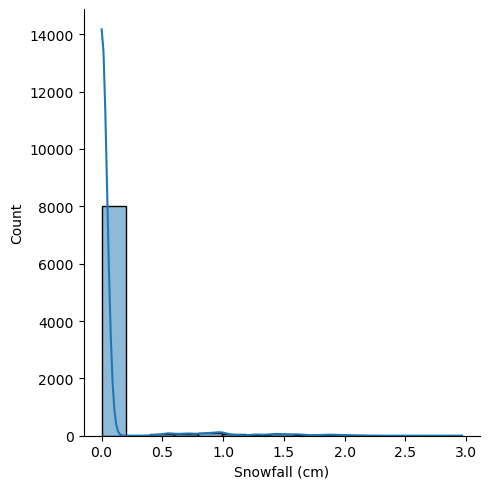

In [55]:
# square root transformation
for i in transform_var:
    plt.figure(figsize=(10,6))
    sns.displot(np.sqrt(df1[i]),kde = True)
    print(stats.skew(np.sqrt(df1[i])))


We have applied square root transform to our numerical features that were selected via VIF and had significant skewness

In [56]:
df1['Solar Radiation (MJ/m2)'] = np.sqrt(df1['Solar Radiation (MJ/m2)'])
df1['Rainfall(mm)'] = np.sqrt(df1['Rainfall(mm)'])
df1['Snowfall (cm)'] = np.sqrt(df1['Snowfall (cm)'])

# Model Building

# Dividing the data into training and test sets

In [57]:
#split the data into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import TargetEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


#target variable
y = df1['Rented Bike Count']

#independent variables
X = df1.drop('Rented Bike Count',axis=1)

#split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Performing Standardization

In [58]:
#scale the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
# Save the scaler to a file using pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Model Selection

In [60]:
#model building and selection
def model(lst,xtrain,xtest,ytrain,ytest):
    
    for i,j in model_dic.items():
        mod = j()
        mod.fit(X_train_scaled,y_train)
        y_pred = mod.predict(X_test_scaled)
        mae = round(mean_absolute_error(y_test,y_pred),2)
        rmse = round(np.sqrt(mean_squared_error(y_test,y_pred)),2)
        r2 = round(r2_score(y_test,y_pred),2)
        print(f'The metrics for the models are {i}: {mae},{rmse},{r2}')

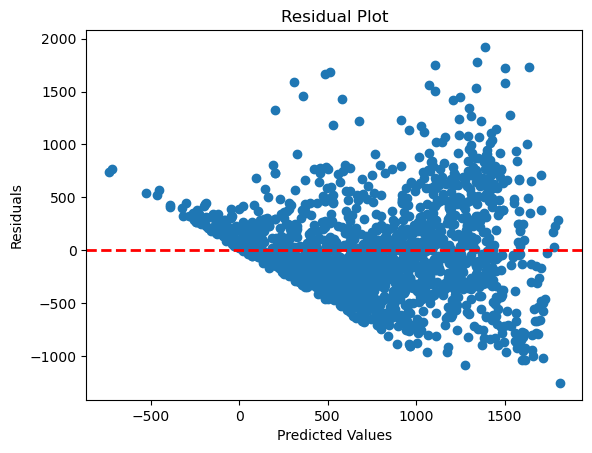

In [61]:
lm = LinearRegression()
lm.fit(X_train_scaled,y_train)
pred = lm.predict(X_test_scaled)


# Calculate residuals
residuals = y_test - pred

# Create a residual plot
plt.scatter(pred, residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

We see that the linear regression does a reasonable job in predicting rented bike counts however there are few predictions which are far off from the observed value as seen from the Residual Plot.

In [62]:
#create dictionary of models to be used
model_dic = {'LinearRegession':LinearRegression,
             'Decision Tree Regressor':DecisionTreeRegressor,
             'Random Forest Regressor': RandomForestRegressor,
            'XGB Regressor':XGBRegressor,
            'Support Vector Regressor':SVR,
            'KNN Regressor':KNeighborsRegressor,
            'GB Regressor':GradientBoostingRegressor}

In [63]:
#testing the models
model(model_dic,X_train_scaled,X_test_scaled,y_train,y_test)

The metrics for the models are LinearRegession: 326.44,427.54,0.53
The metrics for the models are Decision Tree Regressor: 156.47,270.11,0.81
The metrics for the models are Random Forest Regressor: 116.19,194.67,0.9
The metrics for the models are XGB Regressor: 121.65,200.87,0.9
The metrics for the models are Support Vector Regressor: 349.34,506.81,0.35
The metrics for the models are KNN Regressor: 170.2,265.36,0.82
The metrics for the models are GB Regressor: 161.53,243.13,0.85


The Random Forest model performs the best on the test data with 92% accuracy, lets see if hyperparameter tuning improves the model

# Hyperparameter tuning

In [64]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Regressor
rf_model = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_rf_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mean Squared Error on Test Set: 37690.57778676341


In [65]:
print(r2_score(y_test,y_pred))

0.9039941745481064


The accuracy obtained via hyperparameter tuning is almost same as before

In [66]:
feature_imp_df = pd.DataFrame({'Feature': X_train.columns, 'Importance_Value': best_rf_model.feature_importances_})
feature_imp_df


,Feature,Importance_Value
0,Hour,0.303528
1,Temperature(°C),0.381578
2,Humidity(%),0.099258
3,Wind speed (m/s),0.013903
4,Visibility (10m),0.018150
5,Solar Radiation (MJ/m2),0.103126
6,Rainfall(mm),0.034965
7,Snowfall (cm),0.000795
8,Weekend,0.037826
9,Holiday_status,0.006871


# Feature Importance plot

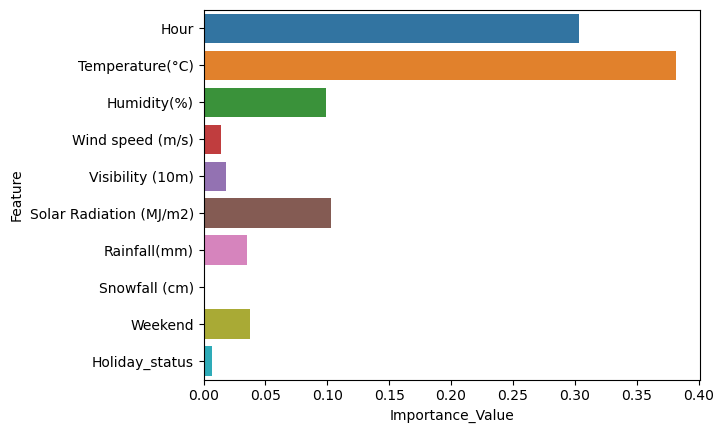

In [67]:
#plot the feature importance diagram
sns.barplot(x='Importance_Value',y='Feature',data = feature_imp_df)
plt.show()

# Model Deployment

In [68]:
import pickle

with open('bike_rental_counts.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)

In [2]:
import requests

url = "https://bikerentalpredictionapp-fvbggse3b7aqchhx.southeastasia-01.azurewebsites.net/predict"
data = {
    "weekend": 1,
    "holiday_status": 0,
    "solar_radiation": 0.5,
    "snowfall": 0.0
}

response = requests.post(url, json=data)
print(response.json())


{'prediction': [252.8442173382173]}
